In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cpyment import CModel

In order to see how to design a model from scratch, let's consider a more interesting kind of epidemic: zombies. The SIZ model (Survivor-Infected-Zombie) will be a variant of the SIR of a more (un)deadly kind. We consider the following processes:

* Zombies bite Survivors, turning them Infected at a rate $\beta$;
* Infected turn into Zombies, given enough time, at a rate $\gamma$;
* some Infected realise their own fate and make the ultimate sacrifice, committing suicide before they can turn, at a rate $\alpha$;
* Survivors and Infected aren't completely helpless: together, they kill zombies at a rate $\delta$ (following the Lotka-Volterra model of predation)

In [54]:
beta = 1.0      # Biting rate
gamma = 1.5     # Rate of turning
alpha = 0.3     # Rate of suicide
delta = 0.4     # Fighting effectiveness of humans vs. zombies

model = CModel('SIZ')

# Zombies biting Survivors
model.set_coupling_rate("S*Z:S=>I", beta, 'beta')
# Infected turning into Zombies
model.set_coupling_rate("I:I=>Z", gamma, 'gamma')
# Infected committing suicide
model.set_coupling_rate("I:I=>", alpha, 'alpha')
# Survivors and infected killing zombies
model.set_coupling_rate("S*Z:Z=>", delta, 'delta_S')
model.set_coupling_rate("I*Z:Z=>", delta, 'delta_I')

In [55]:
Z0 = 0.01
y0 = np.array([1-Z0, 0, Z0])
t = np.linspace(0, 30, 1000)

traj = model.integrate(t, y0)

<IPython.core.display.Javascript object>


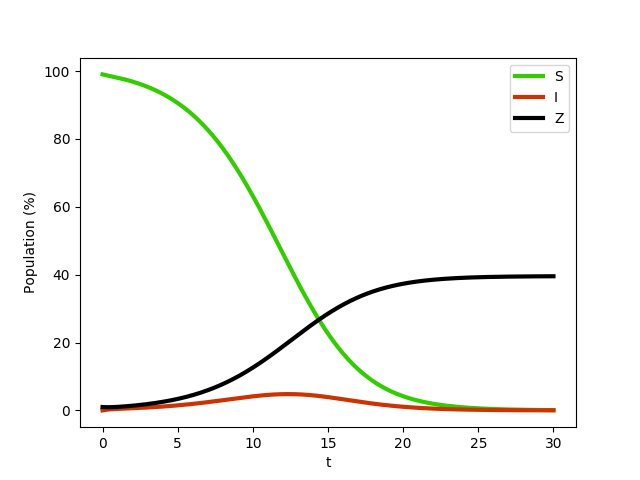

In [56]:
fig, ax = plt.subplots()

ax.set_xlabel('t')
ax.set_ylabel('Population (%)')

ax.plot(t, traj[:,0]*100, c=(0.2, 0.8, 0), label='S', lw=3)
ax.plot(t, traj[:,1]*100, c=(0.8, 0.2, 0), label='I', lw=3)
ax.plot(t, traj[:,2]*100, c=(0., 0., 0), label='Z', lw=3)

ax.legend()